<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clustering-and-Text-Analysis" data-toc-modified-id="Clustering-and-Text-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clustering and Text Analysis</a></span><ul class="toc-item"><li><span><a href="#Pokemon-Clustering" data-toc-modified-id="Pokemon-Clustering-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pokemon Clustering</a></span><ul class="toc-item"><li><span><a href="#KMeans-with-2-clusters" data-toc-modified-id="KMeans-with-2-clusters-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>KMeans with 2 clusters</a></span></li><li><span><a href="#KMeans-with-3-clusters" data-toc-modified-id="KMeans-with-3-clusters-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>KMeans with 3 clusters</a></span></li><li><span><a href="#KMeans-with-4-clusters" data-toc-modified-id="KMeans-with-4-clusters-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>KMeans with 4 clusters</a></span></li><li><span><a href="#KMeans-with-5-clusters" data-toc-modified-id="KMeans-with-5-clusters-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>KMeans with 5 clusters</a></span></li><li><span><a href="#KMeans-with-6-Clusters" data-toc-modified-id="KMeans-with-6-Clusters-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>KMeans with 6 Clusters</a></span></li><li><span><a href="#Findings-of-clustering" data-toc-modified-id="Findings-of-clustering-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Findings of clustering</a></span></li><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-1.1.7"><span class="toc-item-num">1.1.7&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li></ul></li><li><span><a href="#Text-Analysis" data-toc-modified-id="Text-Analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Text Analysis</a></span></li></ul></li></ul></div>

To Do
- remove non-numerical columns
- try different number of clusters
- plot the results
- split the dataset into the clusters and look at statistics of each

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Clustering and Text Analysis

The workshop task this week involves unsupervised learning - an exercise in clustering.   We'll use a the Pokemon dataset to walk through the process of kmeans and hierarchical clustering.  We'll then introduce a text dataset for you to experiment with text analysis.

## Pokemon Clustering

The Pokemon dataset that we used in Week 4 is a good example to use for clustering as it has a number of numerical fields giving the properties of each Pokemon.  We can also imagine that there might be different types of Pokemon within the data, so using clustering methods to find the different types is a reasonable approach.  

First we read the data from the CSV file, we'll use the Pokemon name as the data frame index and drop the first column which is a useless index number. 

In [2]:
df = pd.read_csv('files/Pokemon.csv', index_col=1)
df.drop('Unnamed: 0', axis=1, inplace=True)
df

Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  \
Name                                                                         
Bulbasaur     Grass  Poison    318   45      49       49       65       65   
Ivysaur       Grass  Poison    405   60      62       63       80       80   
Venusaur      Grass  Poison    525   80      82       83      100      100   
Charmander     Fire     NaN    309   39      52       43       60       50   
Charmeleon     Fire     NaN    405   58      64       58       80       65   
...             ...     ...    ...  ...     ...      ...      ...      ...   
Dratini      Dragon     NaN    300   41      64       45       50       50   
Dragonair    Dragon     NaN    420   61      84       65       70       70   
Dragonite    Dragon  Flying    600   91     134       95      100      100   
Mewtwo      Psychic     NaN    680  106     110       90      154       90   
Mew         Psychic     NaN    600  100     100      100      100      100   

            Speed  Stage  Legendary  
Name                                 
Bulbasaur      45      1      False  
Ivysaur        60      2      False  
Venusaur       80      3      False  
Charmander     65      1      False  
Charmeleon     80      2      False  
...           ...    ...        ...  
Dratini        50      1      False  
Dragonair      70      2      False  
Dragonite      80      3      False  
Mewtwo        130      1       True  
Mew           100      1      False  

[151 rows x 11 columns]

Now you should apply the kMeans clustering method to this data. The first step is to select just the numerical fields in the data.  You can either drop the non-numerical fields or make a new data frame containing just the numerical ones (I suggest making a new data frame).

Then apply the kMeans clustering function to the data, following the steps in the lecture notes and text book.  Since we don't have any real idea how many clusters there could be in the data, start with a small number of clusters (eg. 4) just to make it easier to understand the clusters.

In [3]:
# create new df without non-numerical data
df_numeric = df.iloc[: , 2:-1].copy()
df_numeric

Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Stage
Name                                                                   
Bulbasaur     318   45      49       49       65       65     45      1
Ivysaur       405   60      62       63       80       80     60      2
Venusaur      525   80      82       83      100      100     80      3
Charmander    309   39      52       43       60       50     65      1
Charmeleon    405   58      64       58       80       65     80      2
...           ...  ...     ...      ...      ...      ...    ...    ...
Dratini       300   41      64       45       50       50     50      1
Dragonair     420   61      84       65       70       70     70      2
Dragonite     600   91     134       95      100      100     80      3
Mewtwo        680  106     110       90      154       90    130      1
Mew           600  100     100      100      100      100    100      1

[151 rows x 8 columns]

In [4]:
# check missing values
df_numeric.isnull().any()

Total      False
HP         False
Attack     False
Defense    False
Sp. Atk    False
Sp. Def    False
Speed      False
Stage      False
dtype: bool

In [5]:
# define clustering function
def cluster(data, k):
    kmean_name = 'km_' + str(k)
    kmean_name = KMeans(n_clusters=k)
    kmean_name.fit(data)
    col_name = 'label_' + str(k)
    data[col_name] = kmean_name.predict(data)
    return data.head()

### KMeans with 2 clusters

In [6]:
# conduct clustering with 2 clusters
cluster(df_numeric, 2)

Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Stage  \
Name                                                                     
Bulbasaur     318  45      49       49       65       65     45      1   
Ivysaur       405  60      62       63       80       80     60      2   
Venusaur      525  80      82       83      100      100     80      3   
Charmander    309  39      52       43       60       50     65      1   
Charmeleon    405  58      64       58       80       65     80      2   

            label_2  
Name                 
Bulbasaur         0  
Ivysaur           1  
Venusaur          1  
Charmander        0  
Charmeleon        1

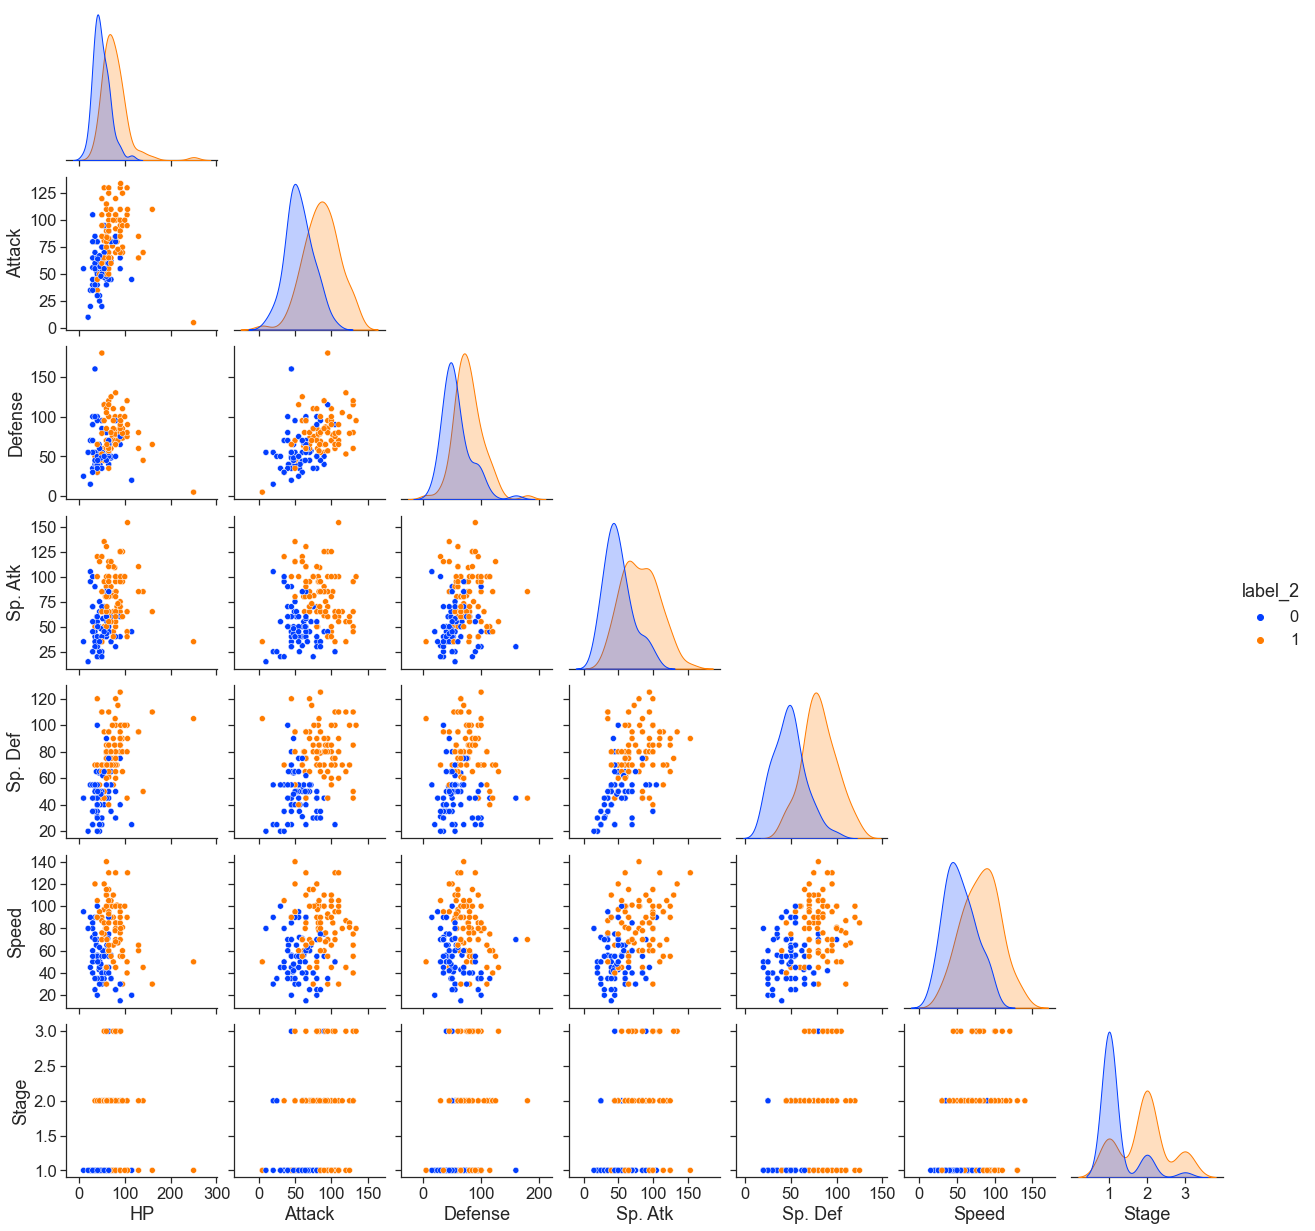

In [60]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.pairplot(df_numeric.reset_index(), 
             vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Stage'],
             palette="bright",
             hue='label_2',                     
             corner=True);

### KMeans with 3 clusters

In [8]:
# conduct clustering with 3 clusters
cluster(df_numeric, 3)

Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Stage  \
Name                                                                     
Bulbasaur     318  45      49       49       65       65     45      1   
Ivysaur       405  60      62       63       80       80     60      2   
Venusaur      525  80      82       83      100      100     80      3   
Charmander    309  39      52       43       60       50     65      1   
Charmeleon    405  58      64       58       80       65     80      2   

            label_2  label_3  
Name                          
Bulbasaur         0        0  
Ivysaur           1        2  
Venusaur          1        1  
Charmander        0        0  
Charmeleon        1        2

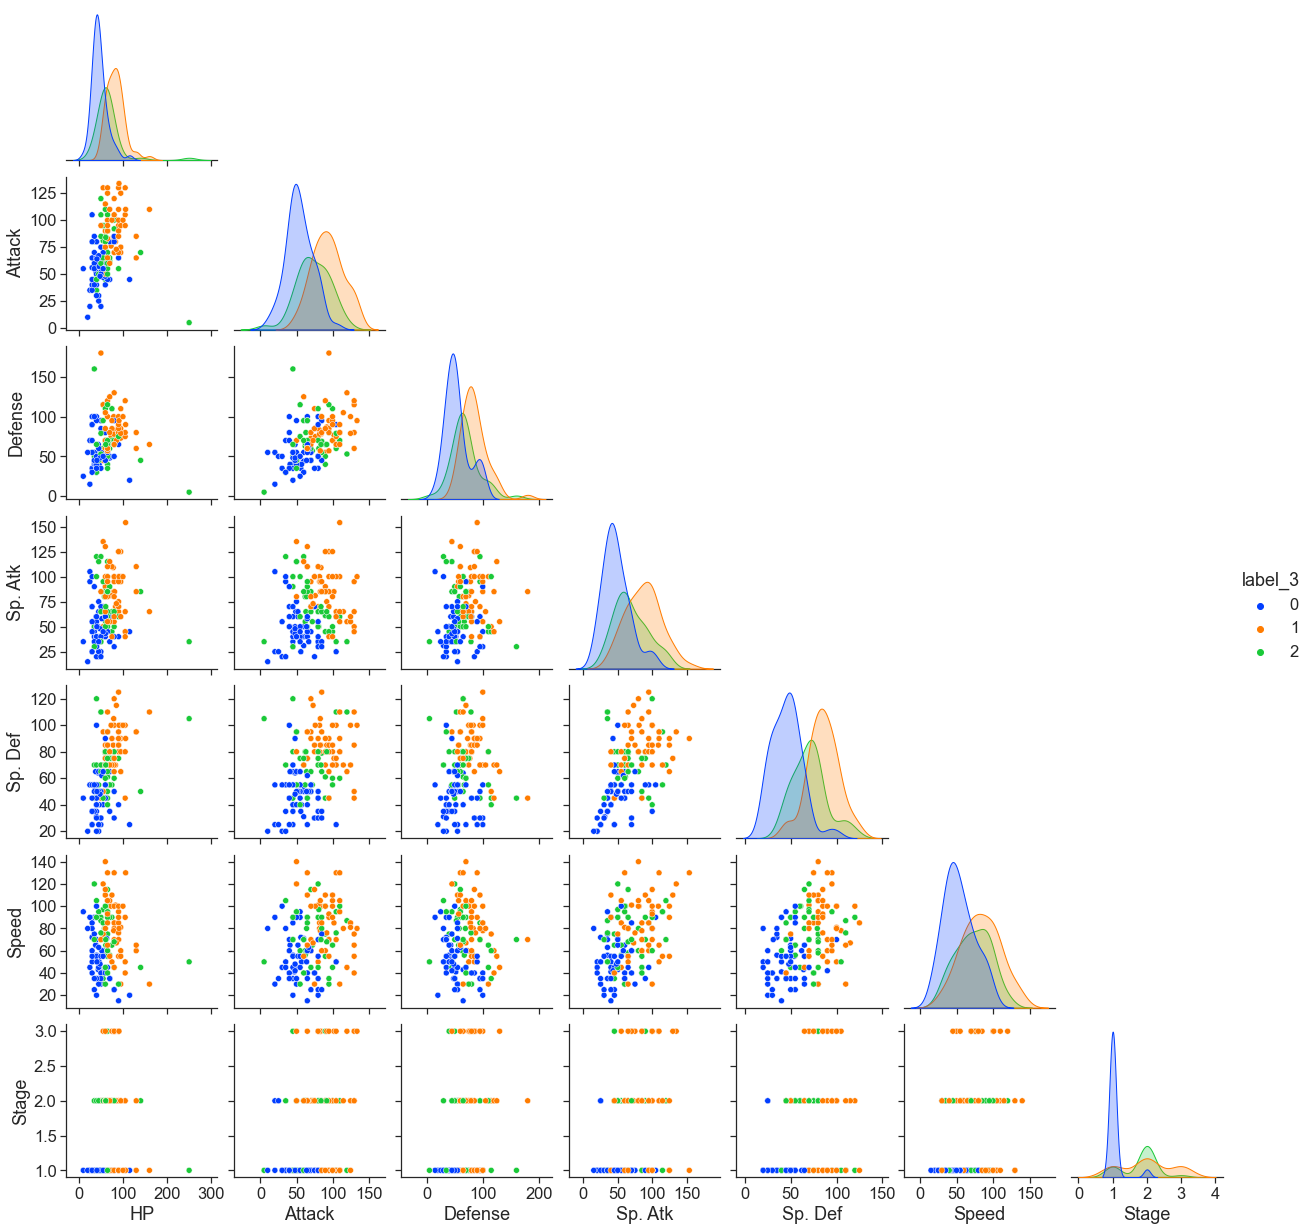

In [61]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.pairplot(df_numeric.reset_index(), 
             vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Stage'], 
             palette="bright",
             hue='label_3',                     
             corner=True);

### KMeans with 4 clusters

In [9]:
# conduct clustering with 4 clusters
cluster(df_numeric, 4)

Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Stage  \
Name                                                                     
Bulbasaur     318  45      49       49       65       65     45      1   
Ivysaur       405  60      62       63       80       80     60      2   
Venusaur      525  80      82       83      100      100     80      3   
Charmander    309  39      52       43       60       50     65      1   
Charmeleon    405  58      64       58       80       65     80      2   

            label_2  label_3  label_4  
Name                                   
Bulbasaur         0        0        1  
Ivysaur           1        2        3  
Venusaur          1        1        0  
Charmander        0        0        1  
Charmeleon        1        2        3

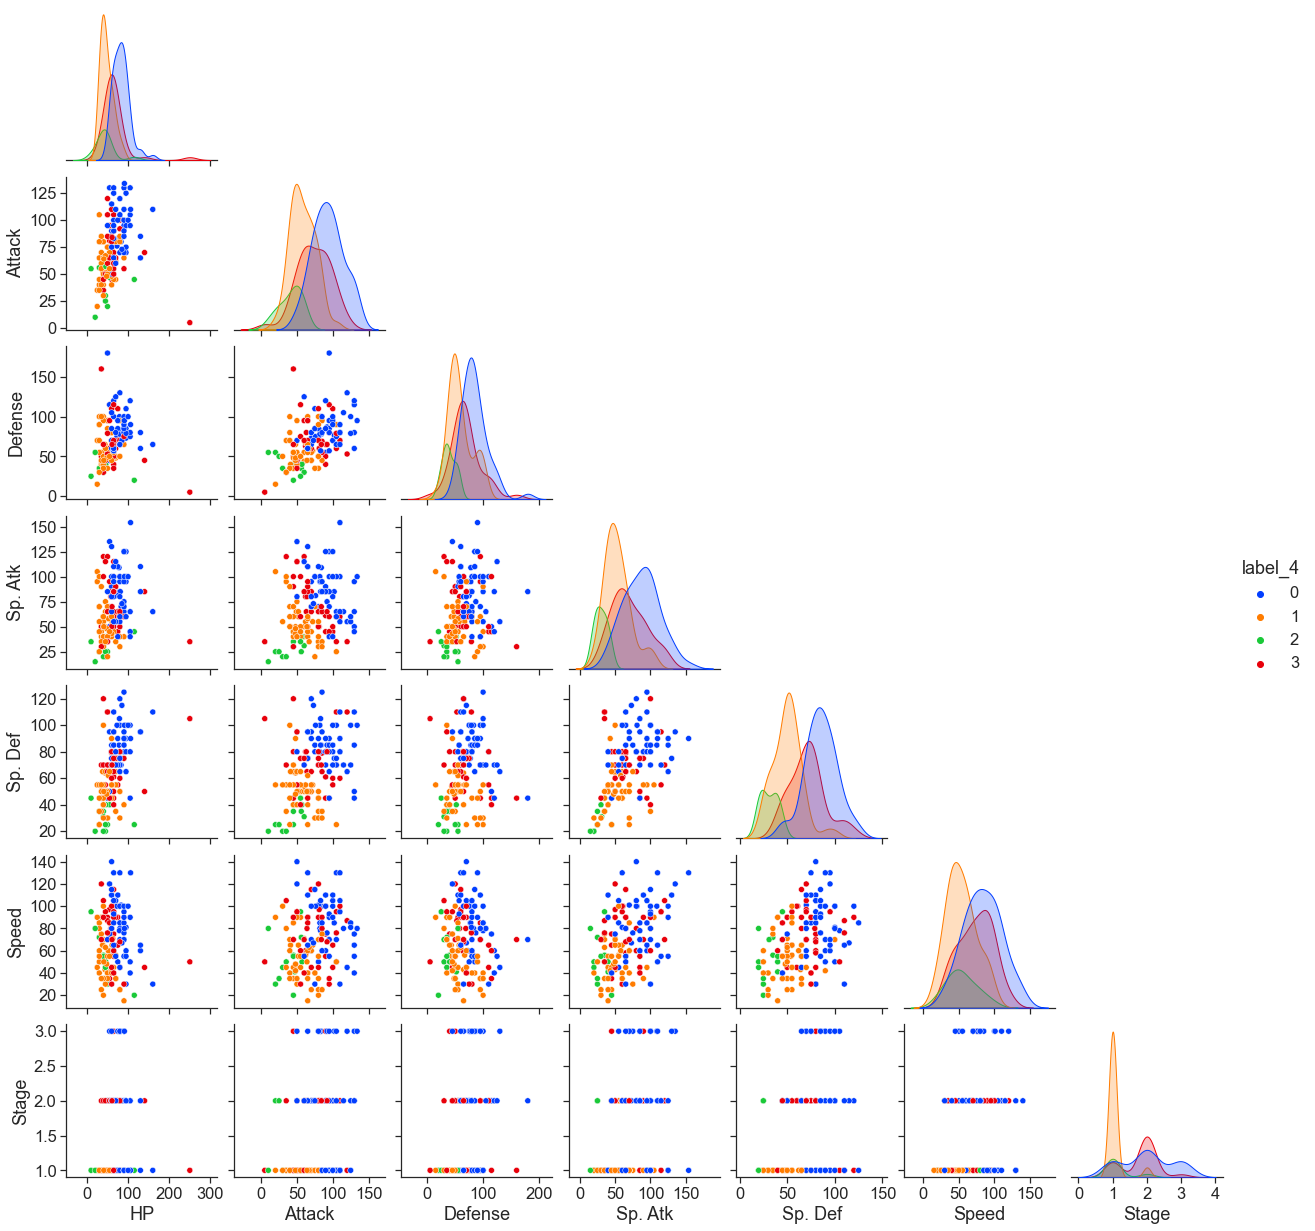

In [62]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.pairplot(df_numeric.reset_index(), 
             vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Stage'], 
             palette="bright",
             hue='label_4',                     
             corner=True);

### KMeans with 5 clusters

In [10]:
# conduct clustering with 5 clusters
cluster(df_numeric, 5)

Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Stage  \
Name                                                                     
Bulbasaur     318  45      49       49       65       65     45      1   
Ivysaur       405  60      62       63       80       80     60      2   
Venusaur      525  80      82       83      100      100     80      3   
Charmander    309  39      52       43       60       50     65      1   
Charmeleon    405  58      64       58       80       65     80      2   

            label_2  label_3  label_4  label_5  
Name                                            
Bulbasaur         0        0        1        1  
Ivysaur           1        2        3        2  
Venusaur          1        1        0        3  
Charmander        0        0        1        1  
Charmeleon        1        2        3        2

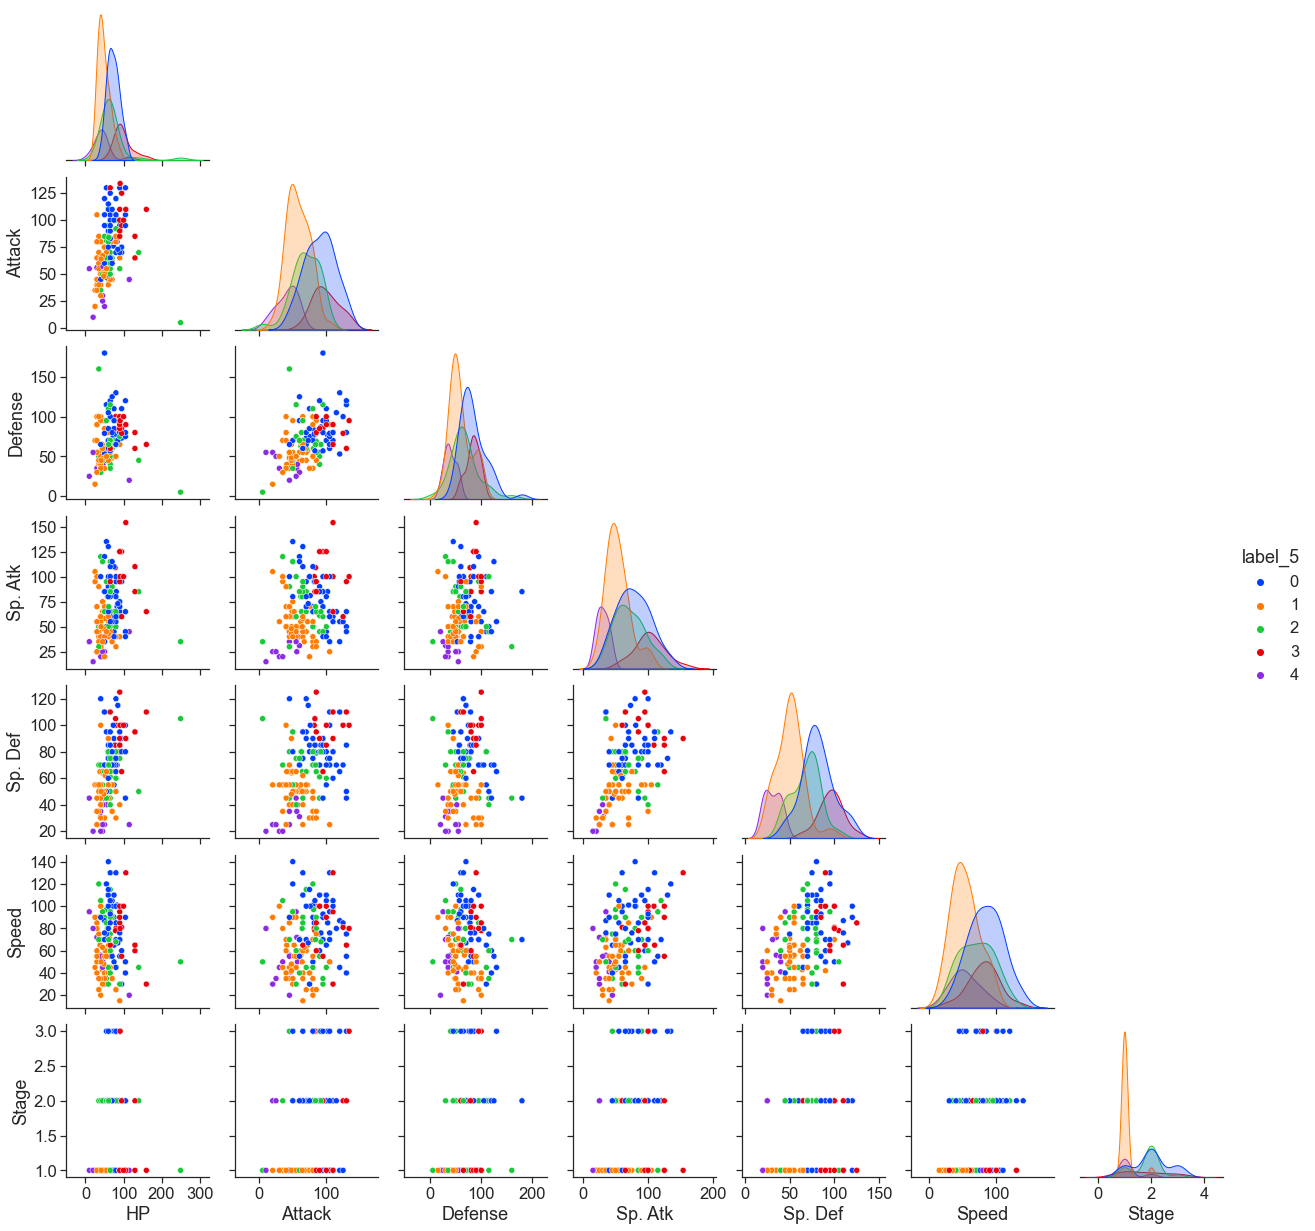

In [63]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.pairplot(df_numeric.reset_index(), 
             vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Stage'], 
             palette="bright",
             hue='label_5',                     
             corner=True);

### KMeans with 6 Clusters

In [66]:
# conduct clustering with 5 clusters
cluster(df_numeric, 6)

Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Stage  \
Name                                                                     
Bulbasaur     318  45      49       49       65       65     45      1   
Ivysaur       405  60      62       63       80       80     60      2   
Venusaur      525  80      82       83      100      100     80      3   
Charmander    309  39      52       43       60       50     65      1   
Charmeleon    405  58      64       58       80       65     80      2   

            label_2  label_3  label_4  label_5  label_6  
Name                                                     
Bulbasaur         0        0        1        1        3  
Ivysaur           1        2        3        2        2  
Venusaur          1        1        0        3        0  
Charmander        0        0        1        1        3  
Charmeleon        1        2        3        2        2

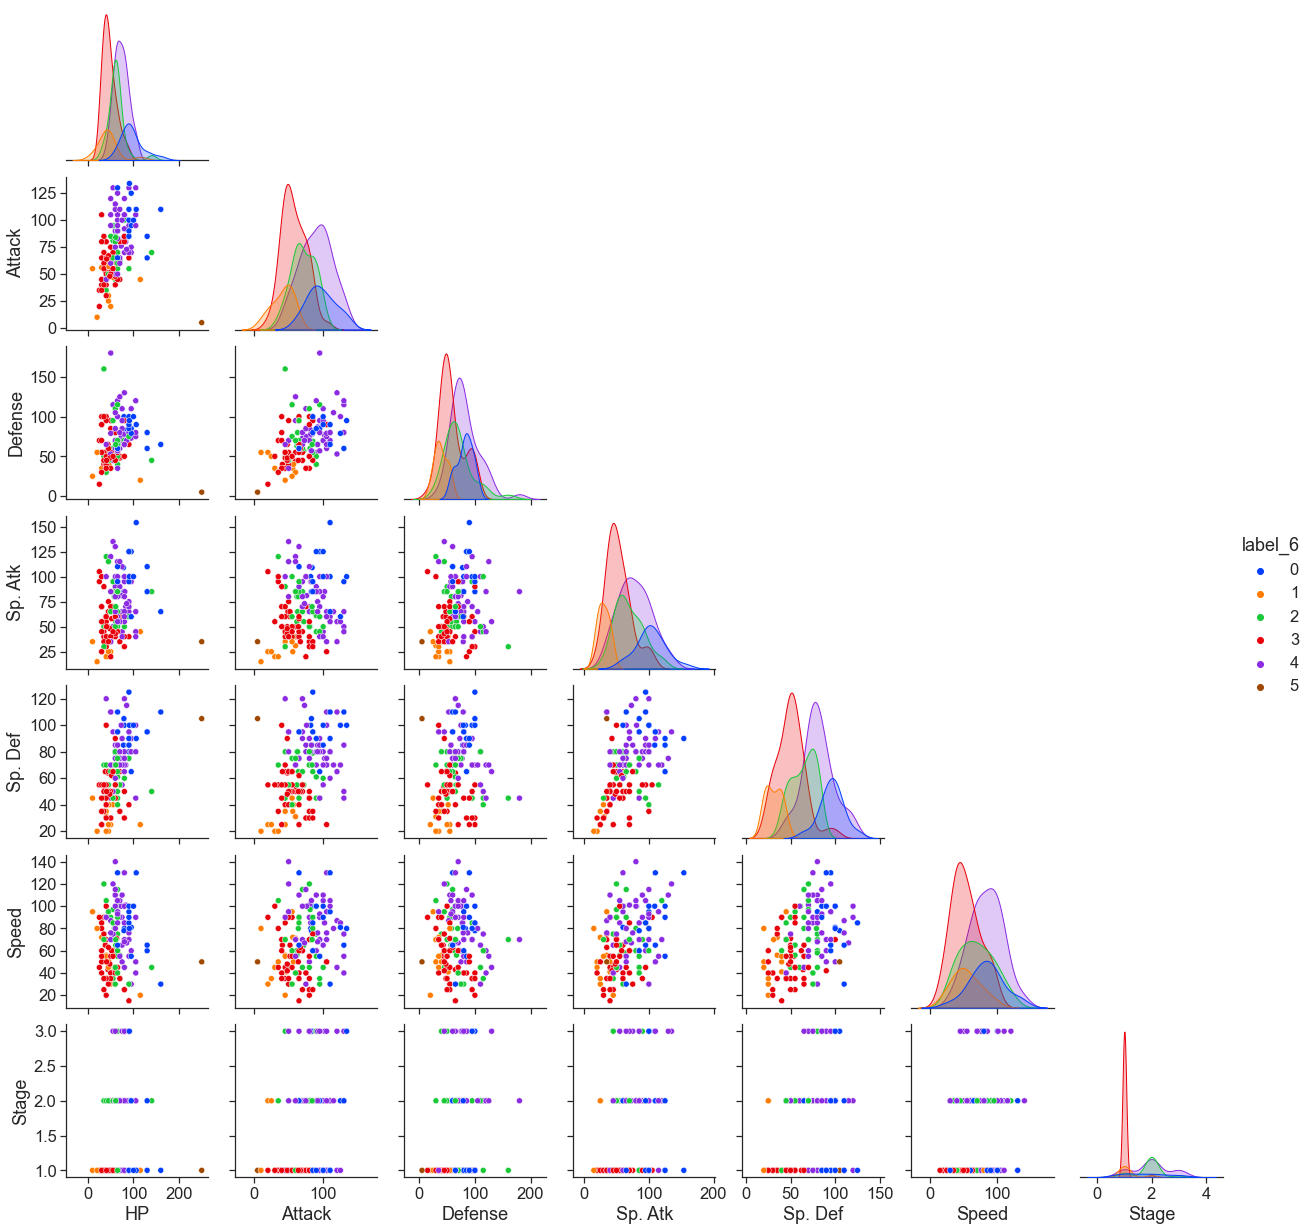

In [67]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.pairplot(df_numeric.reset_index(), 
             vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Stage'], 
             palette="bright",
             hue='label_6',                     
             corner=True);

### Findings of clustering
Once you have applied kMeans you will have some results to explore.  Your goal is to understand the clusters that have been produced. If you know something about Pokemon you might be able to recognise similarities between members of each cluster, if not (and even if you do) you need to understand what the members of each cluster have in common. 

The first task is to find out what the members of each cluster are.  To do this, generate a set of cluster labels using `km.predict()` on your original data and add this to the data frame (see the lecture notes).  Now, explore the difference between each cluster:
 
 * find the mean value for each column by cluster, you can do this by selecting the rows for each cluster and then taking the mean or by using the `groupby` method
 * from these means, can you characterise the four clusters that were found, eg. "Cluster 0 are early stage Pokemon with relatively low HP, Attack and Defence ratings".  Provide descriptions like this of each cluster.
 * Identify two columns that seem to be more distinct between clusters, use these to plot the data with different colours for each cluster to visualise the result of clustering.  Comment on the separation of clusters in your plot.
 * Repeat the experiment with a larger number of clusters. Do more clusters make it easier to distinguish the clusters? 

In [71]:
# find mean value for each column by cluster for k=2
df_numeric.groupby(by="label_2").mean().round(2)

Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Stage  \
label_2                                                                   
0        313.65  48.65   55.99    56.90    50.00    48.25  53.87   1.19   
1        485.70  77.30   86.49    77.76    81.56    80.98  81.61   1.91   

         label_3  label_4  label_5  label_6  
label_2                                      
0           0.32     1.45     1.70     2.46  
1           1.37     1.10     1.12     2.74

__Cluster 0__ are early stage Pokemon with relatively low HP, Attack and Defense values. They are also relatively slow and have overall lower ratings. <br >
__Cluster 1__ are rather advanced stage Pokemon with relatively high HP, Attack and Defense values. They are also relatively fast and have overall higher ratings.

In [65]:
# find mean value for each column by cluster for k=3
df_numeric.groupby(by="label_3").mean().round(2)

Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Stage  \
label_3                                                                   
0        299.95  45.97   53.78    53.57    47.67    45.67  53.29   1.05   
1        516.04  82.62   93.10    84.50    87.25    85.19  83.38   2.00   
2        420.44  66.68   73.05    68.32    69.17    70.49  72.73   1.80   

         label_2  label_4  label_5  label_6  
label_3                                      
0           0.00     1.22     1.67     0.69  
1           1.00     0.00     0.92     1.92  
2           0.73     2.90     1.56     1.83

__Cluster 0__ are stage 1 Pokemon with very low scores for all features.<br >
__Cluster 1__ are stage 2 Pokemon with relatively high scores for all features approximately at the same level except for Attack. <br >
__Cluster 2__ are less advanced stage Pokemon than Cluster 1, but still relatively high compared to Cluster 0. Generally, Pokemons in this cluster seem to have ratings in between Cluster 0 and 1 while their ratings rather tend towards Cluster 1.

In [69]:
# find mean value for each column by cluster for k=4
df_numeric.groupby(by="label_4").mean().round(2)

Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Stage  \
label_4                                                                   
0        516.04  82.62   93.10    84.50    87.25    85.19  83.38   2.00   
1        319.85  47.26   57.94    58.06    52.96    50.17  53.47   1.06   
2        238.00  44.31   40.77    38.62    29.69    30.85  53.77   1.15   
3        423.28  66.74   73.36    68.64    69.90    71.28  73.36   1.79   

         label_2  label_3  label_5  label_6  
label_4                                      
0           1.00     1.00     0.92     2.69  
1           0.00     0.09     1.00     2.96  
2           0.00     0.00     4.00     1.00  
3           0.77     2.00     1.59     2.64

In [70]:
# find mean value for each column by cluster for k=5
df_numeric.groupby(by="label_5").mean().round(2)

Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Stage  \
label_5                                                                   
0        489.55  72.55   90.41    83.32    77.82    81.02  84.43   2.00   
1        319.85  47.26   57.94    58.06    52.96    50.17  53.47   1.06   
2        414.61  68.97   68.90    66.94    71.16    68.06  70.58   1.84   
3        559.31  98.06   99.25    83.12   102.06    95.94  80.88   1.81   
4        238.00  44.31   40.77    38.62    29.69    30.85  53.77   1.15   

         label_2  label_3  label_4  label_6  
label_5                                      
0           1.00     1.18     0.55     3.91  
1           0.00     0.09     1.00     2.96  
2           0.71     2.00     3.00     2.29  
3           1.00     1.00     0.00     0.00  
4           0.00     0.00     2.00     1.00

### Hierarchical Clustering

Since we don't know how many clusters there should be in the data, a better approach is to use Hierarchical clustering and examine the dendograph to understand what natural clusters are present in the data.  

Apply Hiearchical clustering to the data and plot the dendogram.  From this diagram, how many clusters should the data be separated into?   Can you characterise these clusters? 

## Text Analysis

Text is an important data source and in the lecture we looked at how to use word vectors to create features from text. We can use this method to derive a numerical vector from each text and then perform clustering on the texts.  

We'll use a set of book summaries from the [CMU Book Summaries Corpus](http://www.cs.cmu.edu/~dbamman/booksummaries.html) in this experiment.  This contains a large number of summaries (16,559) but we'll work with just the first 100 books which usefully include some of the 'books' from the Bible which we might expect to form a cluster different to the other texts.  

The first task is to read the data. It is made available in tab-separated format but has no column headings. We can use `read_csv` to read this but we need to set the separator to `\t` (tab) and supply the column names.  The names come from the [ReadMe](files/booksummaries/README.txt) file.

In [7]:
names = ['wid', 'fid', 'title', 'author', 'date', 'genres', 'summary']

books = pd.read_csv("files/booksummaries/booksummaries.txt", sep="\t", header=None, names=names)

# select just the first 100 books
books = books[:100]

books.head()

wid      fid                                      title           author  \
0   620  /m/0hhy                                Animal Farm    George Orwell   
1   843  /m/0k36                         A Clockwork Orange  Anthony Burgess   
2   986  /m/0ldx                                 The Plague     Albert Camus   
3  1756  /m/0sww  An Enquiry Concerning Human Understanding       David Hume   
4  2080  /m/0wkt                       A Fire Upon the Deep     Vernor Vinge   

         date                                             genres  \
0  1945-08-17  {"/m/016lj8": "Roman \u00e0 clef", "/m/06nbt":...   
1        1962  {"/m/06n90": "Science Fiction", "/m/0l67h": "N...   
2        1947  {"/m/02m4t": "Existentialism", "/m/02xlf": "Fi...   
3         NaN                                                NaN   
4         NaN  {"/m/03lrw": "Hard science fiction", "/m/06n90...   

                                             summary  
0   Old Major, the old boar on the Manor Farm, ca...  
1   Alex, a teenager living in near-future Englan...  
2   The text of The Plague is divided into five p...  
3   The argument of the Enquiry proceeds by a ser...  
4   The novel posits that space around the Milky ...

To analyse the text, you first need to compute the numerical features. To do this, use the `TfidfVectorizer` from the sklearn library (this is already imported at the top of this notebook) following the method used in the lecture.  Use a small number of features (word) in your vectorizer (eg. 50-100) just to simplify understanding the process.  

Once you have done this you can apply the clustering methods to this data just as you did above for the Pokemon data. Use the same approach to cluster these 100 books and understand the clusters you find. Note, the features you have now will be word TFIDF scores and you probably have 50-100 of them making it harder to understand the clusters numerically. So, you will have to look at the book titles, authors and publication dates to see if you can understand what clusters have been formed. In particular, look to see if the Bible books have been put into the same cluster distinct from the other texts. 